In [1]:
!pip install tensorflow numpy


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [3]:
# Load data (top 10,000 most frequent words)
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 8s 0us/step


In [4]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
313/313 [==============================] - 99s 300ms/step - loss: 0.4101 - accuracy: 0.8066 - val_loss: 0.3260 - val_accuracy: 0.8712
Epoch 2/5
313/313 [==============================] - 97s 310ms/step - loss: 0.2363 - accuracy: 0.9103 - val_loss: 0.3078 - val_accuracy: 0.8770
Epoch 3/5
313/313 [==============================] - 100s 319ms/step - loss: 0.1747 - accuracy: 0.9363 - val_loss: 0.3199 - val_accuracy: 0.8734
Epoch 4/5
313/313 [==============================] - 102s 325ms/step - loss: 0.1314 - accuracy: 0.9532 - val_loss: 0.3613 - val_accuracy: 0.8748
Epoch 5/5
313/313 [==============================] - 87s 279ms/step - loss: 0.1110 - accuracy: 0.9605 - val_loss: 0.4353 - val_accuracy: 0.8562


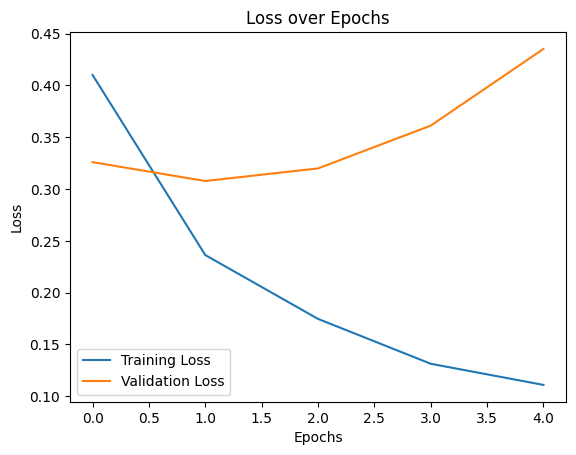

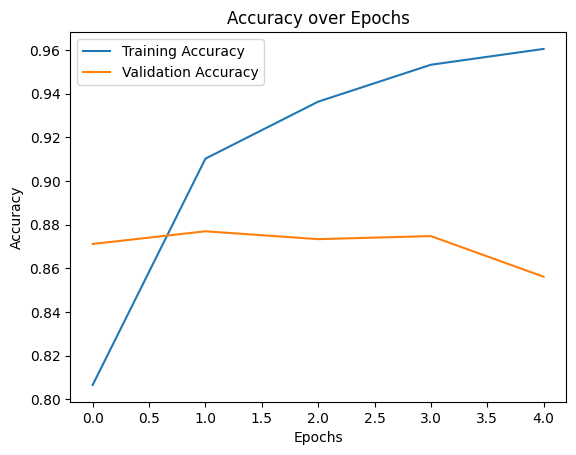

In [7]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.8506399989128113
